In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Loading the data from CSV file into a pandas DataFrame
raw_mail_data = pd.read_csv('/content/mail_data.csv')
print("Dataset preview:")
print(raw_mail_data.head())

Dataset preview:
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
# Replace null values with empty strings
mail_data = raw_mail_data.fillna('')

In [4]:
# Check the shape of the dataset
print(f"Dataset shape: {mail_data.shape}")

Dataset shape: (5572, 2)


In [5]:
# Encode spam as 0 and ham as 1 in the 'Category' column
mail_data.loc[mail_data['Category'] == 'spam', 'Category'] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category'] = 1

In [6]:
# Separate the data into features (X) and labels (Y)
X = mail_data['Message']
Y = mail_data['Category'].astype('int')  # Convert labels to integers
print("Sample messages:")
print(X.head())
print("Sample labels:")
print(Y.head())

Sample messages:
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object
Sample labels:
0    1
1    1
2    0
3    1
4    1
Name: Category, dtype: int64


In [7]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

Training set size: 4457, Test set size: 1115


In [8]:
# Convert text data into numerical feature vectors using TF-IDF
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


In [9]:
# Initialize the Decision Tree model with regularization to avoid overfitting
model = DecisionTreeClassifier(random_state=3, max_depth=10, min_samples_split=10, min_samples_leaf=5)

In [10]:
# Perform hyperparameter tuning using GridSearchCV to find the best parameters
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_features, Y_train)


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=10, min_samples_leaf=5,
                                              min_samples_split=10,
                                              random_state=3),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [11]:
# Print the best parameters from GridSearchCV
print(f"Best parameters from GridSearchCV: {grid_search.best_params_}")

# Train the Decision Tree model on the training data using the best parameters
best_model = grid_search.best_estimator_

Best parameters from GridSearchCV: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


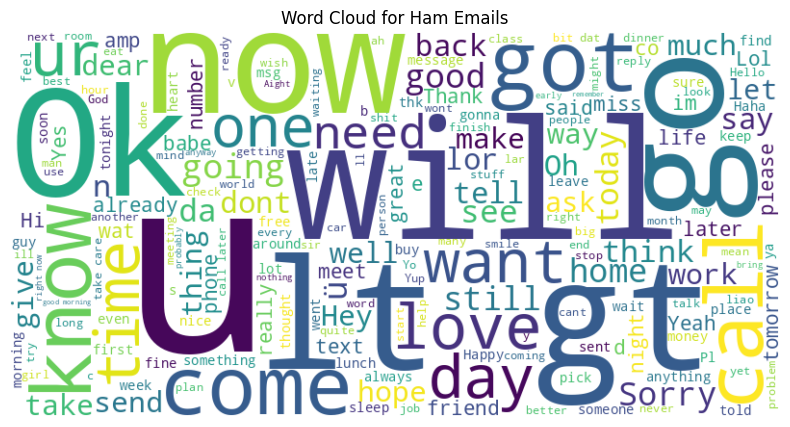

In [14]:
# Extract ham messages
ham_messages = " ".join(mail_data[mail_data['Category'] == 1]['Message'])

# Generate the word cloud
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_messages)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Emails')
plt.show()

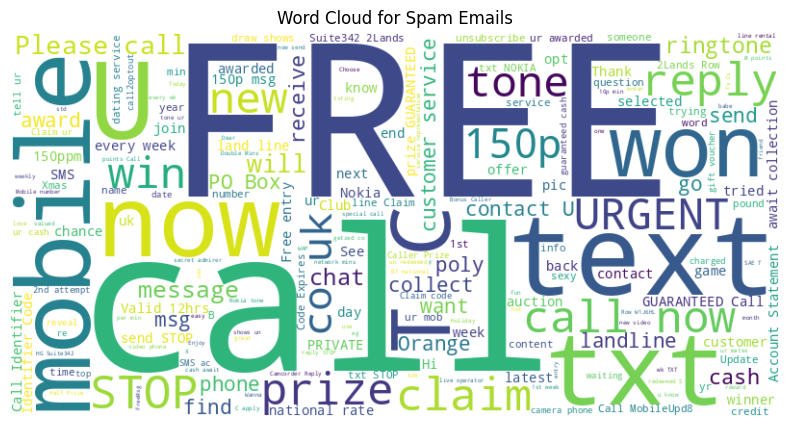

In [15]:
# Extract spam messages
spam_messages = " ".join(mail_data[mail_data['Category'] == 0]['Message'])

# Generate the word cloud
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_messages)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.show()

In [12]:
# Evaluate the model on the training data
prediction_on_training_data = best_model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print(f"Accuracy on training data: {accuracy_on_training_data:.2f}")


Accuracy on training data: 0.98


In [13]:
# Evaluate the model on the test data
prediction_on_test_data = best_model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print(f"Accuracy on test data: {accuracy_on_test_data:.2f}")

Accuracy on test data: 0.96


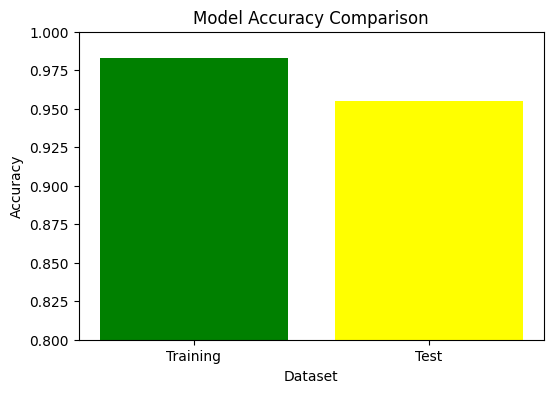

In [16]:
# Data for accuracy
accuracy_data = {'Dataset': ['Training', 'Test'], 'Accuracy': [accuracy_on_training_data, accuracy_on_test_data]}

# Create a DataFrame
accuracy_df = pd.DataFrame(accuracy_data)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(accuracy_df['Dataset'], accuracy_df['Accuracy'], color=['green', 'yellow'])
plt.ylim(0.8, 1)
plt.title('Model Accuracy Comparison')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.show()

In [17]:
# Calculate precision, recall, and F1-score
precision = precision_score(Y_test, prediction_on_test_data)
recall = recall_score(Y_test, prediction_on_test_data)
f1 = f1_score(Y_test, prediction_on_test_data)
accuracy=accuracy_score(Y_test, prediction_on_test_data)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

Accuracy: 0.9551569506726457
Precision: 0.953187250996016
Recall: 0.996875
F1-Score: 0.9745417515274949


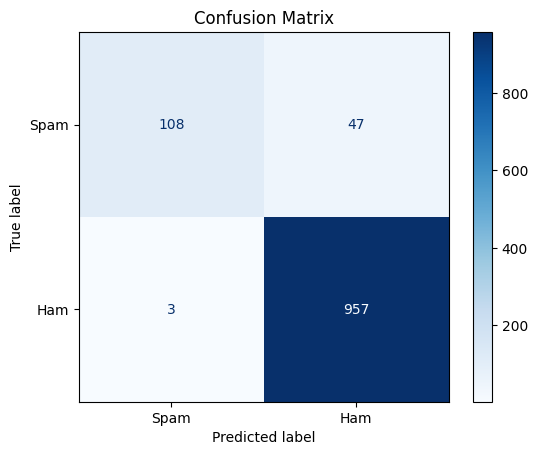

In [21]:
# Confusion matrix
cm = confusion_matrix(Y_test, prediction_on_test_data)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Spam', 'Ham'])
display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# Cross-validation to check model stability
cv_scores = cross_val_score(best_model, X_train_features, Y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean():.2f}")

Cross-validation scores: [0.95515695 0.96076233 0.9674523  0.95959596 0.95398429]
Average cross-validation score: 0.96


In [23]:
# Test the model with a sample email input
input_mail = ["CONGRATULATION! You have Won a Prize!"]
input_data_features = feature_extraction.transform(input_mail)
prediction = best_model.predict(input_data_features)

# Display the prediction result
print(f"Prediction for the input email: {'Ham mail' if prediction[0] == 1 else 'Spam mail'}")

Prediction for the input email: Spam mail
